<a href="https://colab.research.google.com/github/glaubermateus/Ciencia_De_Dados/blob/main/4-estatistica/1-eda/EDA_Base_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introdução

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
sns.set_style('white')
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Biblioteca para importar manualmente
from google.colab import files

In [ ]:
# Importando manualmente o arquivo p/ o ambiente do colab
uploaded = files.upload()

Saving Chocolate Sales.csv to Chocolate Sales (1).csv


In [ ]:
# Importando o dataset e vendo as primeiras linhas
df = pd.read_csv ('/content/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
# Verificando os nomes das colunas
print(df.columns.tolist())
# Alterando o nome das colunas
df.columns = ['Vendedor','Pais','Produto','Data','Valor_Venda','Caixas_Enviadas']
print(df.columns.tolist())

['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']
['Vendedor', 'Pais', 'Produto', 'Data', 'Valor_Venda', 'Caixas_Enviadas']


In [ ]:
# Verificando dimensão
print(f"Quantidade total de colunas: {df.shape[1]}")
print(f"Quantidade total de registros: {df.shape[0]}")

Quantidade total de colunas: 6
Quantidade total de registros: 1094


In [ ]:
# Verificando info gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Vendedor         1094 non-null   object
 1   Pais             1094 non-null   object
 2   Produto          1094 non-null   object
 3   Data             1094 non-null   object
 4   Valor_Venda      1094 non-null   object
 5   Caixas_Enviadas  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
# Dados ausentes
df.isna().sum()

,0
Vendedor,0
Pais,0
Produto,0
Data,0
Valor_Venda,0
Caixas_Enviadas,0


In [ ]:
# Dados duplicados
df.duplicated().sum()

np.int64(0)

## 2. Transformação e Limpeza dos Dados

In [ ]:
# Criando uma copia
df_original = df.copy()
# Verificando o comprimento da coluna Data
date_length = df['Data'].str.len()
date_length.value_counts()

,count
Data,
9,1094


In [ ]:
# Alterando a coluna Valor_Venda
df['Valor_Venda'] = df['Valor_Venda'].str.replace('$','')
df['Valor_Venda'] = df['Valor_Venda'].str.replace(',','')
df['Valor_Venda'] = df['Valor_Venda'].astype(float)

# Convertendo a Coluna Data para o tipo Datetime e Criando uma Coluna de Mes_Ano
df['Data'] = pd.to_datetime(df['Data'], format = '%d-%b-%y')
df['Mes_Ano'] = df['Data'].dt.strftime('%m-%Y')

# Criando uma coluna de Valor por Caixa Enviada
df['Valor_Por_Caixa'] = round(df['Valor_Venda'] / df['Caixas_Enviadas'], ndigits=2)

In [ ]:
# Verificando dados ausentes
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7
index,Vendedor,Pais,Produto,Data,Valor_Venda,Caixas_Enviadas,Mes_Ano,Valor_Por_Caixa
0,0,0,0,0,0,0,0,0


In [ ]:
# Checando duplicidade de valores
df.duplicated().sum()

np.int64(0)

In [ ]:
# Separação das variáveis (numéricas e categóricas)
numericas = []
categoricas = []
for c in df.columns:
  if (df[c].dtype == 'int64') or (df[c].dtype == 'float64'):
    numericas.append(c)
  else:
    categoricas.append(c)
print('Quantidade de variáveis numéricas: ', len(numericas))
print('Variáveis numéricas: ', numericas)
print('Quantidade de variáveis categóricas: ', len(categoricas))
print('Variáveis categóricas: ', categoricas)

Quantidade de variáveis numéricas:  3
Variáveis numéricas:  ['Valor_Venda', 'Caixas_Enviadas', 'Valor_Por_Caixa']
Quantidade de variáveis categóricas:  5
Variáveis categóricas:  ['Vendedor', 'Pais', 'Produto', 'Data', 'Mes_Ano']


## 3. Analise Exploratoria de Dados

In [ ]:
df.describe()
#df_ok['Valor_Venda'].mode()

,Data,Valor_Venda,Caixas_Enviadas,Valor_Por_Caixa
count,1094,1094.000000,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,105.720073
min,2022-01-03 00:00:00,7.000000,1.000000,0.010000
25%,2022-03-02 00:00:00,2390.500000,70.000000,14.590000
50%,2022-05-11 00:00:00,4868.500000,135.000000,36.145000
75%,2022-07-04 00:00:00,8027.250000,228.750000,79.157500
max,2022-08-31 00:00:00,22050.000000,709.000000,4291.000000
std,NaN,4102.442014,121.544145,278.658461


In [ ]:
# Valores unicos por coluna
print("\nQtd Valores Unicos nas Colunas Categoricas:")
for col in ['Vendedor', 'Pais', 'Produto']:
    print(f"\n{col}: {df[col].nunique()} valores unicos")
    print(df[col].value_counts())


Qtd Valores Unicos nas Colunas Categoricas:

Vendedor: 25 valores unicos
Vendedor
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64

Pais: 6 valores unicos
Pais
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64

Produto: 22 valores unicos
Produto
Eclairs                 60
50% Dark 

## 4. Data Visualization

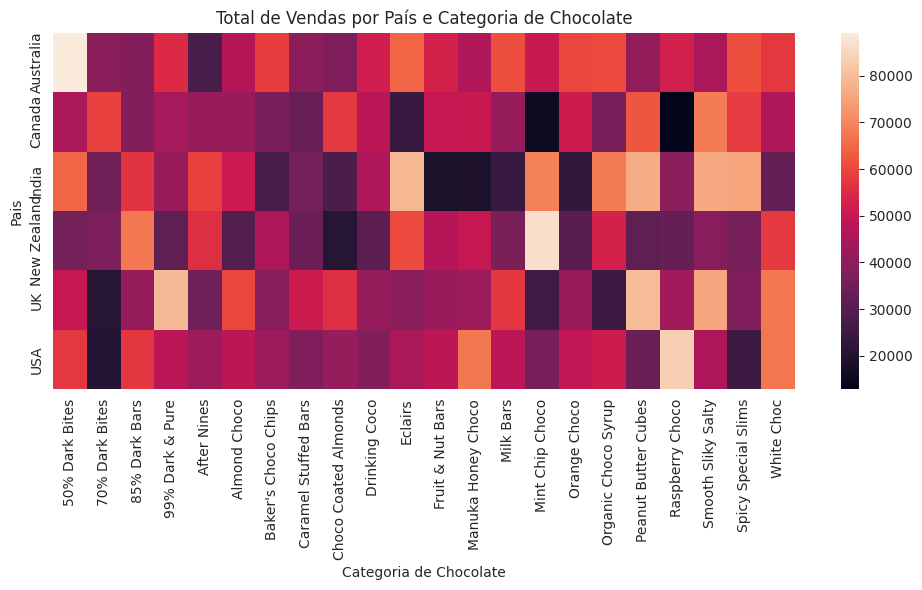

In [ ]:
# Tabela dinamica sumarizando o total de vendas por país e categoria de chocolate
pivot_table = df.pivot_table(index = 'Pais', columns = 'Produto', values = 'Valor_Venda', aggfunc = 'sum', fill_value=0)
# Figura
mpl.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=False)
mpl.title('Total de Vendas por País e Categoria de Chocolate')
mpl.xlabel('Categoria de Chocolate')
mpl.ylabel('Pais')
mpl.tight_layout()
mpl.show()

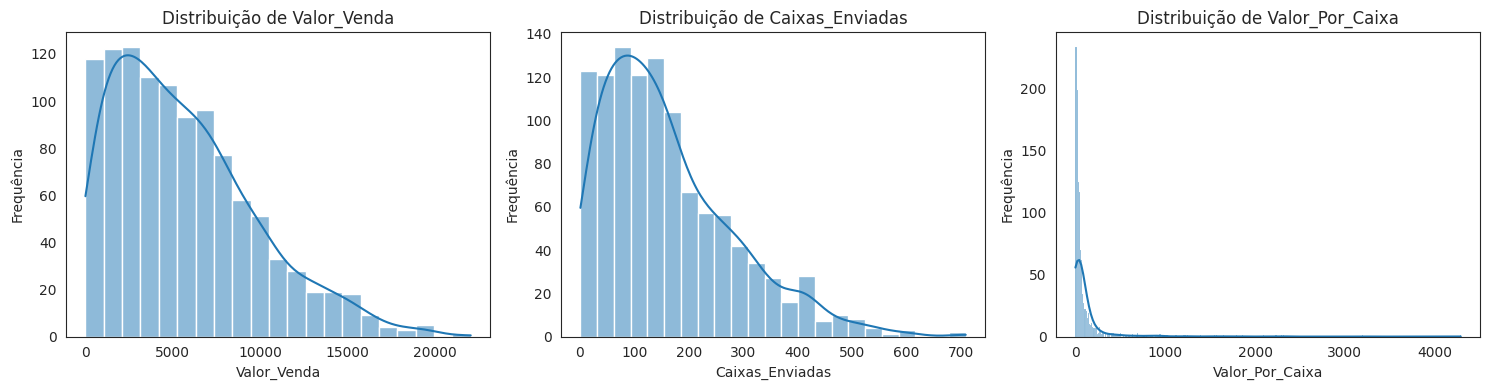

In [ ]:
# Distribuição das variáveis numéricas (Distplot)

# Defina o número de colunas
n_cols = 3
n_vars = len(numericas)
n_rows = -(-n_vars // n_cols)  # arredondamento para cima

fig, axes = mpl.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

# "axes" pode ser 2D, então achatamos para iterar facilmente
axes = axes.flatten()

for i, c in enumerate(numericas):
    sns.histplot(df[c], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequência')

# Remove os eixos vazios, caso n_vars não seja múltiplo de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar o grafico
mpl.tight_layout()
mpl.show()

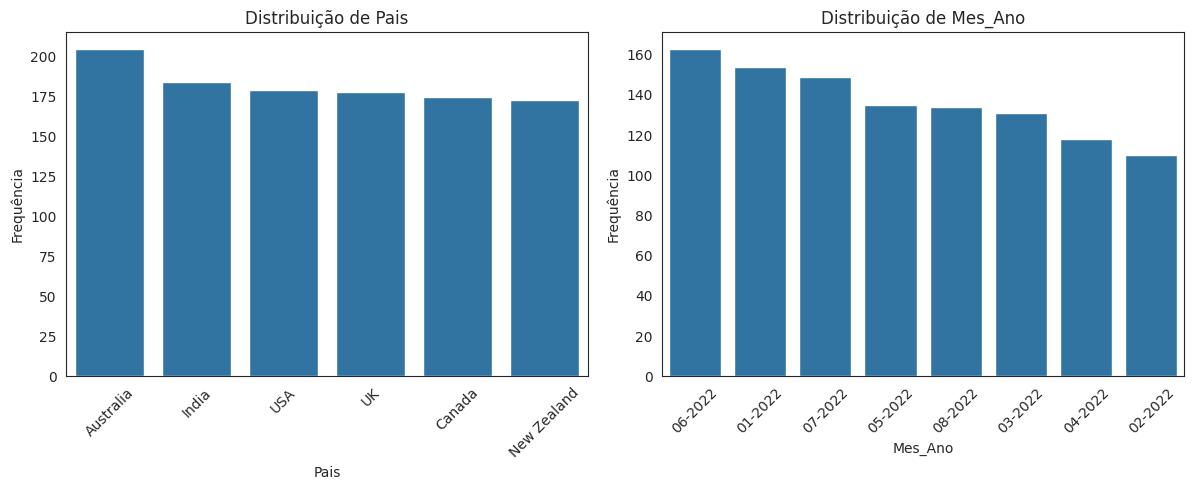

In [ ]:
# Definir colunas fixas
atributos = ['Pais','Mes_Ano']
n_cols = 3
n_vars = len(atributos)
n_rows = -(-n_vars // n_cols)  # arredondamento para cima

fig, axes = mpl.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))

# Achatar os eixos para iterar
axes = axes.flatten()

for i, c in enumerate(atributos):
    sns.countplot(data=df, x=c, ax=axes[i], order=df[c].value_counts().index)
    axes[i].set_title(f'Distribuição de {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequência')
    axes[i].tick_params(axis='x', rotation=45)  # rotaciona os labels no eixo X

# Remover eixos não usados
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

mpl.tight_layout()
mpl.show()

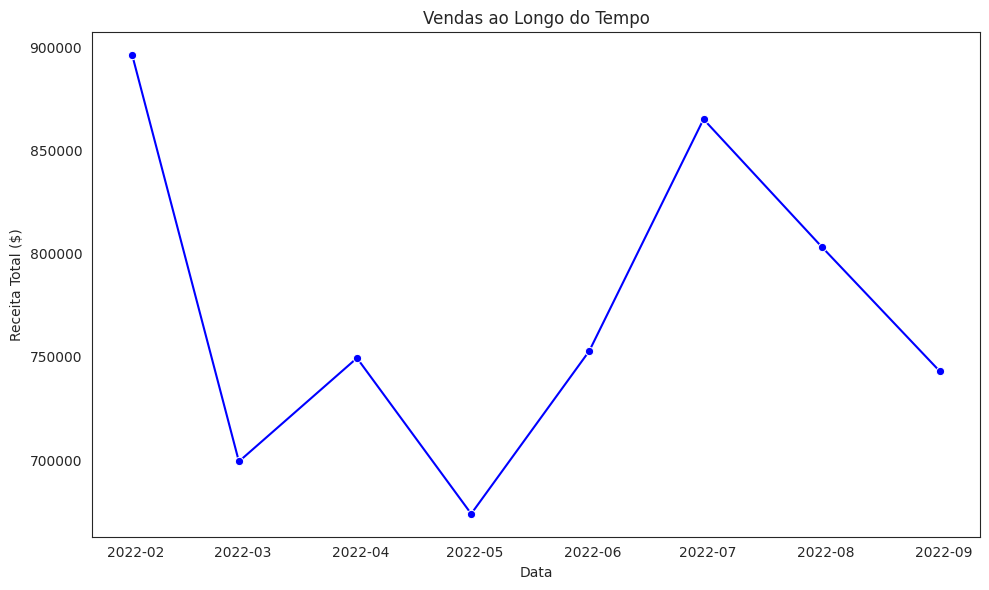

In [ ]:
# Vendas ao longo do tempo
sales_time = df.groupby(pd.Grouper(key = 'Data', freq = 'M'))['Valor_Venda'].sum().reset_index()

mpl.figure(figsize = (10,6))
sns.lineplot(x = 'Data', y = 'Valor_Venda', data = sales_time, marker = 'o', color = 'b')
mpl.title('Vendas ao Longo do Tempo')
mpl.xlabel('Data')
mpl.ylabel('Receita Total ($)')
mpl.tight_layout()
mpl.show()

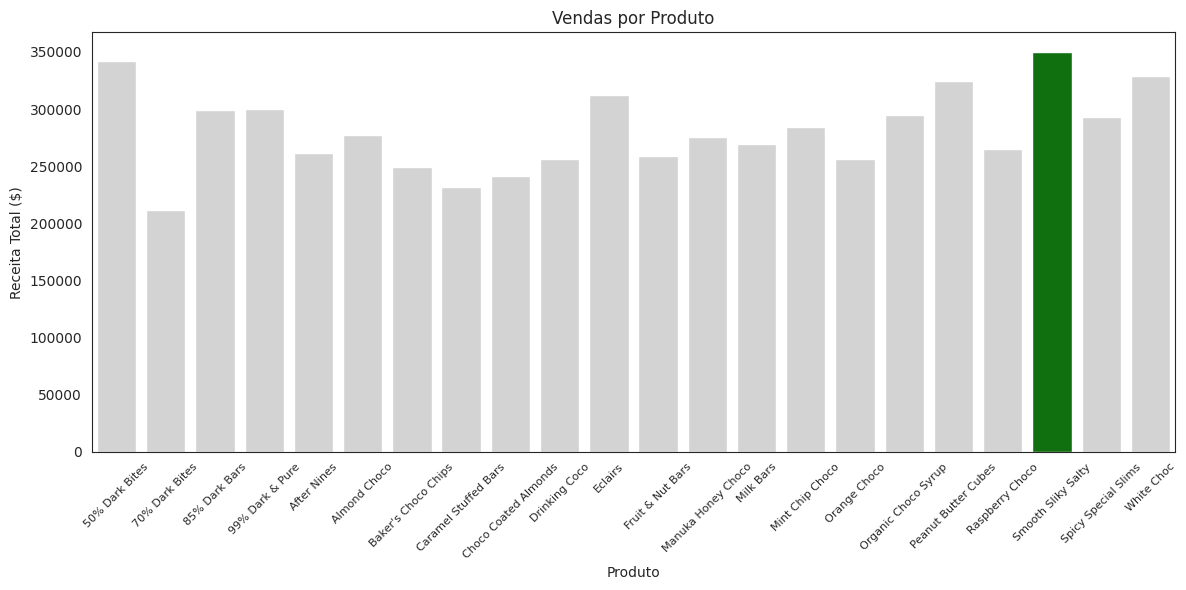

In [ ]:
# Grupos por produto
vendas_produto = df.groupby('Produto')['Valor_Venda'].sum().reset_index()
# Melhor produto
produto_mais_vendido = vendas_produto.loc[vendas_produto['Valor_Venda'].idxmax()]
# Cores
cores = ['green' if p == produto_mais_vendido['Produto'] else 'lightgray' for p in vendas_produto['Produto']]
# Figura
mpl.figure(figsize = (12,6))
sns.barplot(x = 'Produto', y = 'Valor_Venda', data = vendas_produto, palette = cores)
mpl.title('Vendas por Produto')
mpl.xlabel('Produto')
mpl.ylabel('Receita Total ($)')
mpl.xticks(rotation=45, fontsize=8)
mpl.tight_layout()
mpl.show()

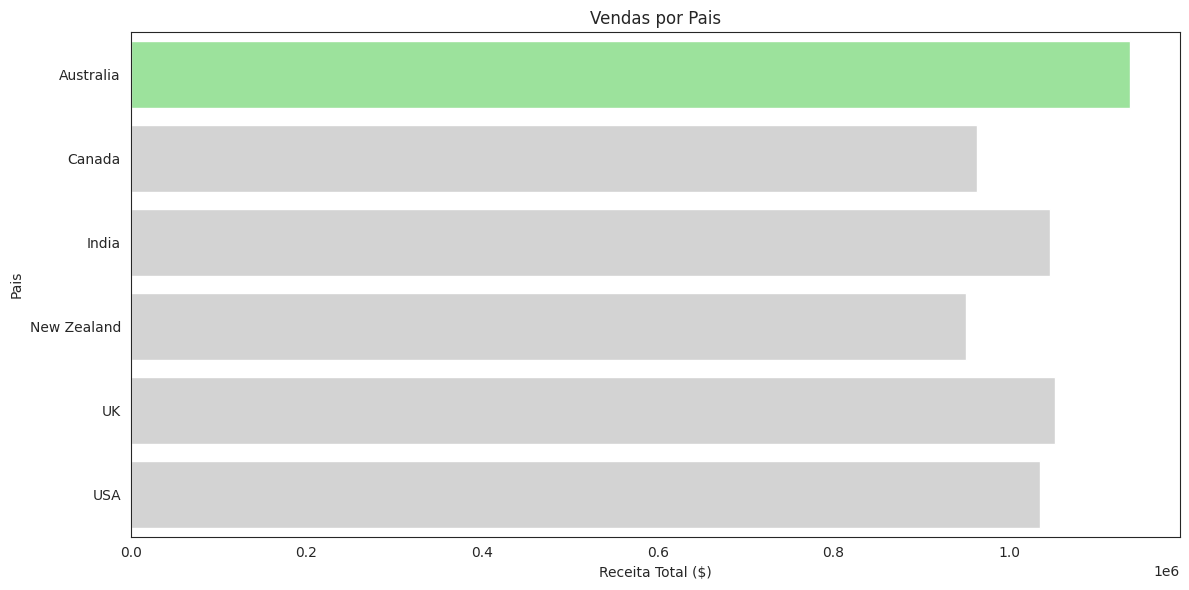

In [ ]:
# Grupos por pais
vendas_pais = df.groupby('Pais')['Valor_Venda'].sum().reset_index()
# Melhor produto
pais_mais_vendas = vendas_pais.loc[vendas_pais['Valor_Venda'].idxmax()]
# Cores
cores = ['lightgreen' if p == pais_mais_vendas['Pais'] else 'lightgray' for p in vendas_pais['Pais']]
# Figura
mpl.figure(figsize = (12,6))
sns.barplot(x = 'Valor_Venda', y = 'Pais', data = vendas_pais, palette = cores)
mpl.title('Vendas por Pais')
mpl.xlabel('Receita Total ($)')
mpl.ylabel('Pais')
mpl.tight_layout()
mpl.show()

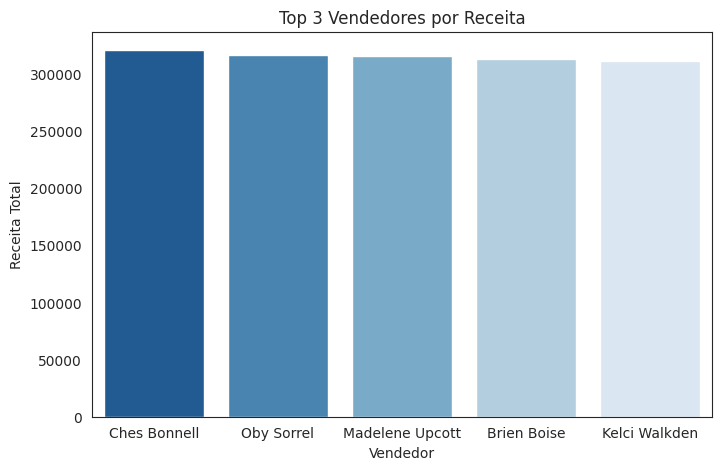

In [ ]:
# Top 5 Vendedores
top_vendedores = df.groupby("Vendedor")["Valor_Venda"].sum().nlargest(5).reset_index()
top_vendedores

# Criar o gráfico
mpl.figure(figsize=(8,5))
sns.barplot(data=top_vendedores, x="Vendedor", y="Valor_Venda", palette="Blues_r")
mpl.title("Top 3 Vendedores por Receita")
mpl.xlabel("Vendedor")
mpl.ylabel("Receita Total")
mpl.show()

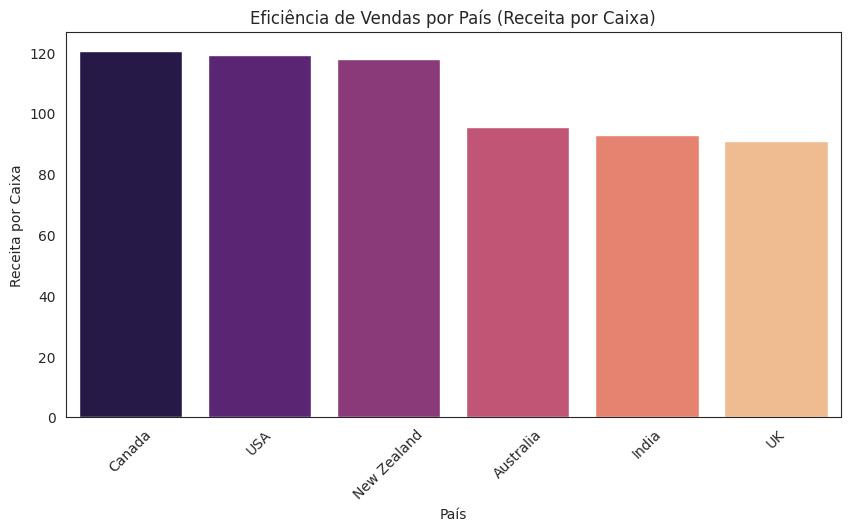

In [ ]:
# Eficiencia_pais
eficiencia_pais = df.groupby("Pais")["Valor_Por_Caixa"].mean().sort_values(ascending=False).reset_index()
# Criar o gráfico
mpl.figure(figsize=(10,5))
sns.barplot(data=eficiencia_pais, x="Pais", y="Valor_Por_Caixa", palette="magma")
mpl.title("Eficiência de Vendas por País (Receita por Caixa)")
mpl.xlabel("País")
mpl.ylabel("Receita por Caixa")
mpl.xticks(rotation=45)
mpl.show()

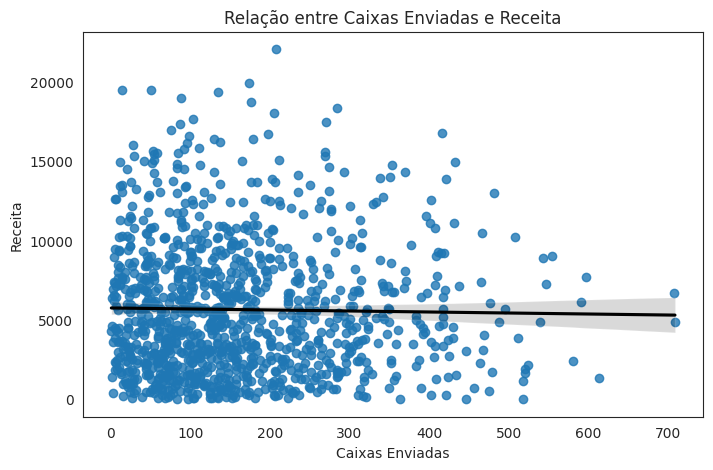

In [ ]:
# Correlação entre Caixas Enviadas e Receita
mpl.figure(figsize=(8,5))
sns.regplot(data=df, x="Caixas_Enviadas", y="Valor_Venda", line_kws={"color": "black"})
mpl.title("Relação entre Caixas Enviadas e Receita")
mpl.xlabel("Caixas Enviadas")
mpl.ylabel("Receita")
mpl.show()

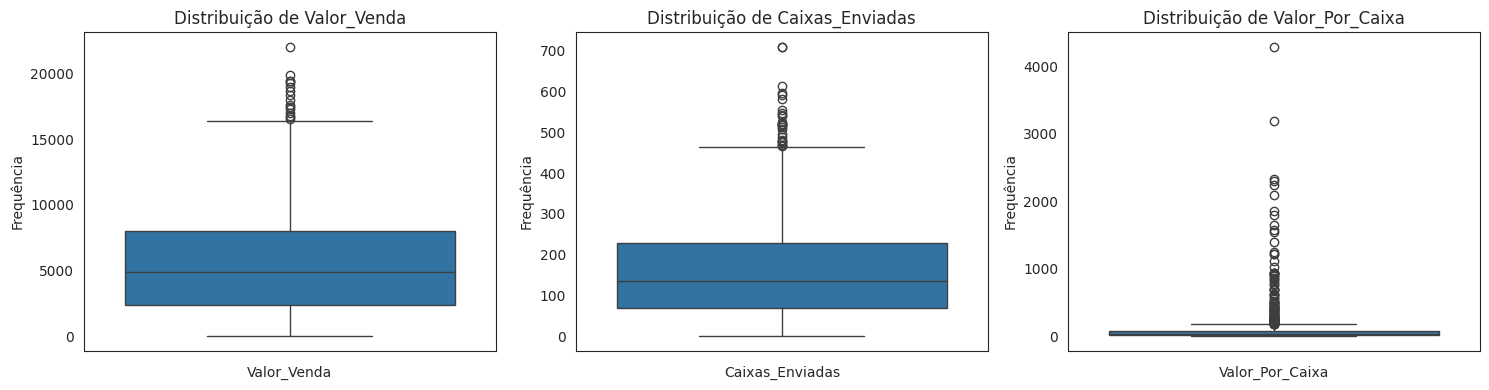

In [ ]:
# Distribuição das variáveis numéricas (Boxplot)

# Defina o número de colunas
n_cols = 3
n_vars = len(numericas)
n_rows = -(-n_vars // n_cols)  # arredondamento para cima

fig, axes = mpl.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

# "axes" pode ser 2D, então achatamos para iterar facilmente
axes = axes.flatten()

for i, c in enumerate(numericas):
    sns.boxplot(df[c], ax=axes[i])
    axes[i].set_title(f'Distribuição de {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequência')

# Remove os eixos vazios, caso n_vars não seja múltiplo de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar o grafico
mpl.tight_layout()
mpl.show()